# Sesión 1 – Introducción al Análisis Predictivo
### Exploración inicial de datos con Python

En esta primera sesión trabajaremos con un conjunto de datos sintéticos para:
- Explorar tipos de variables (numéricas y categóricas).
- Visualizar distribuciones simples.
- Comprender cómo el análisis descriptivo prepara el camino para la predicción.


### Paso 1: Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Paso 2: Cargar el conjunto de datos

In [2]:

df = pd.read_csv('/workspaces/proyecto1/datos/Accidentes_Viales_20250516.csv')
df.head()

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos Involucrados,Heridos,Accidente con,Muertes,Clase de Accidente
0,01/03/2024 12:00:00 AM,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,0,CHOQUE
1,01/06/2024 12:00:00 AM,A001602263,CALLE 14 CARRERA 28 SAN JOSÉ,SAN JOSÉ,2,3,HERIDOS,0,CHOQUE
2,01/09/2024 12:00:00 AM,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,0,CHOQUE
3,01/12/2024 12:00:00 AM,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,0,CHOQUE
4,01/12/2024 12:00:00 AM,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,0,CHOQUE


### Paso 3: Revisar estructura del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Fecha_Ocurrencia        512 non-null    object
 1   Codigo_Accidente        512 non-null    object
 2   Direccion               512 non-null    object
 3   Barrio                  512 non-null    object
 4   Vehiculos Involucrados  512 non-null    int64 
 5   Heridos                 512 non-null    int64 
 6   Accidente con           512 non-null    object
 7   Muertes                 512 non-null    object
 8   Clase de Accidente      512 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.1+ KB


### Paso 4: Descripción estadística general

In [4]:
df.describe(include='all')

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos Involucrados,Heridos,Accidente con,Muertes,Clase de Accidente
count,512,512,512,512,512.000000,512.000000,512,512,512
unique,412,509,503,52,NaN,NaN,3,5,4
top,12/14/2024 12:00:00 AM,A001371905,CALLE 13 CARRERA 16 CENTRO,No registra,NaN,NaN,HERIDOS,NO APLICA,CHOQUE
freq,3,2,2,115,NaN,NaN,412,453,450
mean,NaN,NaN,NaN,NaN,1.865234,1.298828,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.471707,0.914419,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN


## Visualización exploratoria
A continuación veremos algunas formas básicas de visualizar nuestros datos.

### Gráfico 1:CANTIDAD DE ACCIDENTES POR MES 

In [5]:
#1.GRAFICA 
# Asegurarse de que la columna de fechas esté en formato datetime
df['Fecha_Ocurrencia'] = pd.to_datetime(df['Fecha_Ocurrencia'], errors='coerce')


/tmp/ipykernel_3018/3242251183.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha_Ocurrencia'] = pd.to_datetime(df['Fecha_Ocurrencia'], errors='coerce')


*Interpretación: Este gráfico nos muestra cuántos casos hay por categoría de género en la base.*

In [6]:

# Crear una columna para el mes y año
df['Mes_Año'] = df['Fecha_Ocurrencia'].dt.to_period('M')

In [7]:
# Contar accidentes por mes
accidentes_por_mes = df['Mes_Año'].value_counts().sort_index()

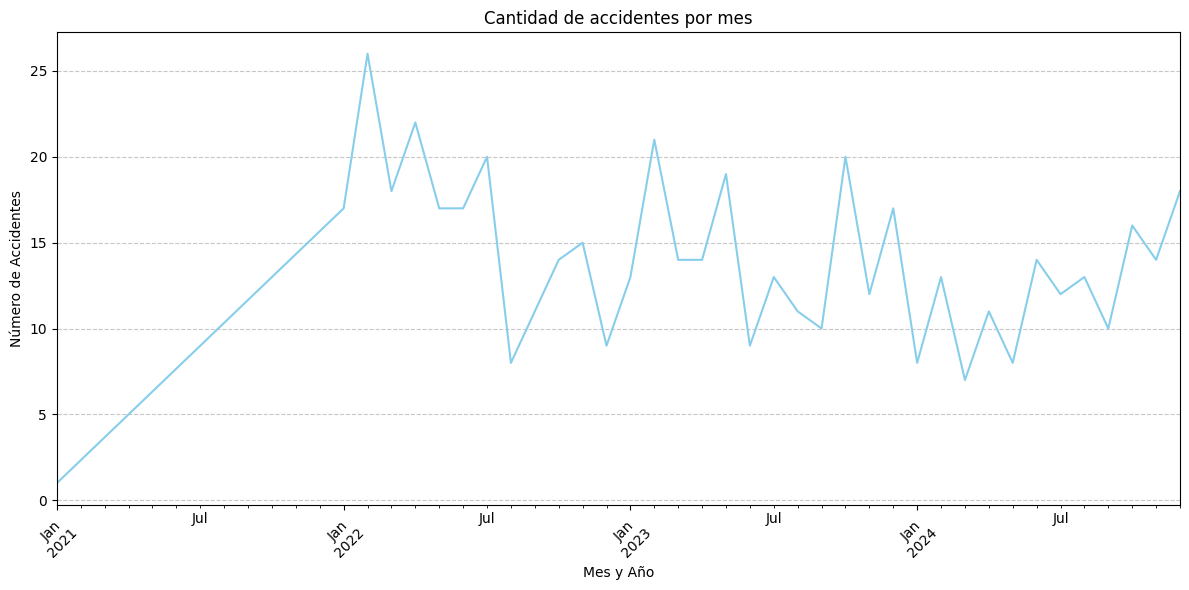

In [8]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
accidentes_por_mes.plot(kind='line', color='skyblue')
plt.title('Cantidad de accidentes por mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
#2. GRAFICA
# Contar la frecuencia de cada clase de accidente
clases_accidente = df['Clase de Accidente'].value_counts()

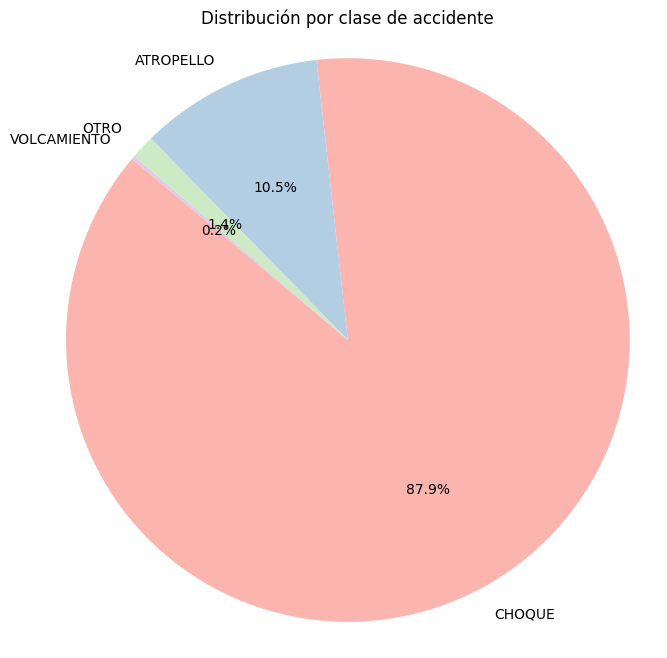

In [10]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(clases_accidente,
        labels=clases_accidente.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Distribución por clase de accidente')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

In [11]:
# Contar la cantidad de accidentes por barrio
accidentes_por_barrio = df['Barrio'].value_counts().head(10)  # Muestra solo los 10 barrios con más accidentes

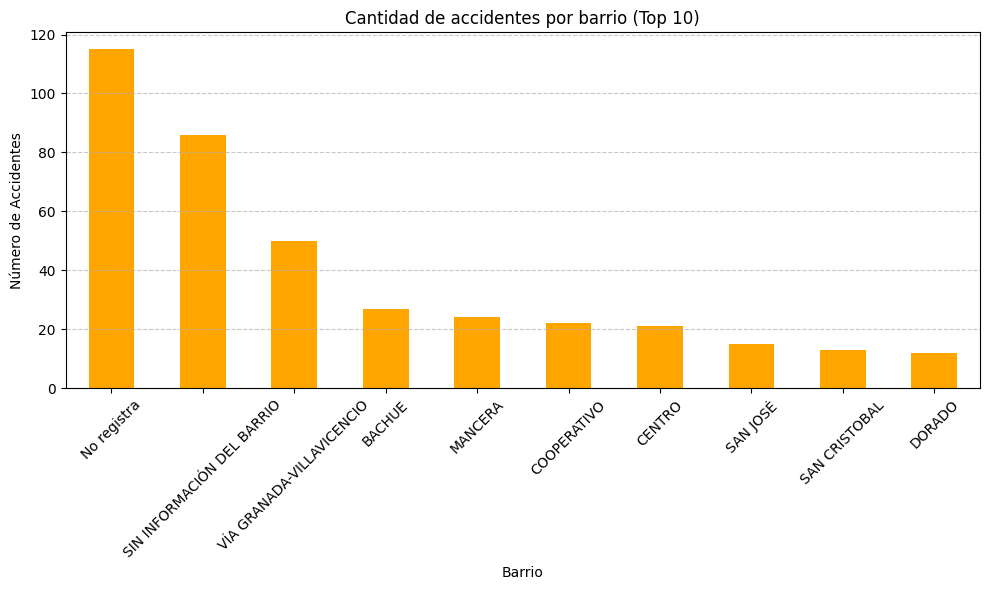

In [12]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_barrio.plot(kind='bar', color='orange')
plt.title('Cantidad de accidentes por barrio (Top 10)')
plt.xlabel('Barrio')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Asegurar que la columna 'Heridos' esté en formato numérico
df['Heridos'] = pd.to_numeric(df['Heridos'], errors='coerce')

In [14]:
# Calcular el promedio de heridos por clase de accidente
promedio_heridos = df.groupby('Clase de Accidente')['Heridos'].mean().sort_values()

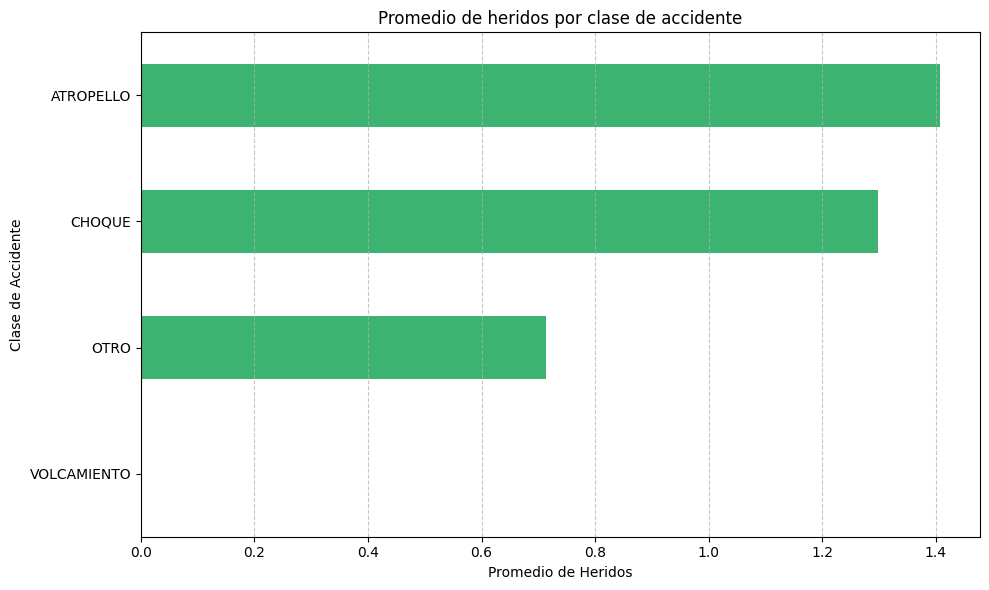

In [15]:

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
promedio_heridos.plot(kind='barh', color='mediumseagreen')
plt.title('Promedio de heridos por clase de accidente')
plt.xlabel('Promedio de Heridos')
plt.ylabel('Clase de Accidente')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#PREDICIONES DE LA PROBABILIDAD DE OCURRENCIA 
